In [115]:
import numpy as np

from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from skimage.io import imshow
import matplotlib.image as mpimg
#%matplotlib inline
import seaborn as sns
import mlxtend
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelBinarizer
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [116]:
# Input data files consisting of the images
pics = np.load("olivetti_faces.npy")
labels = np.load("olivetti_faces_target.npy")

In [117]:
print("pics: ", pics.shape)  #400 imagens de 64pixeis x 64pixeis
print("labels: ", labels.shape)

pics:  (400, 64, 64)
labels:  (400,)


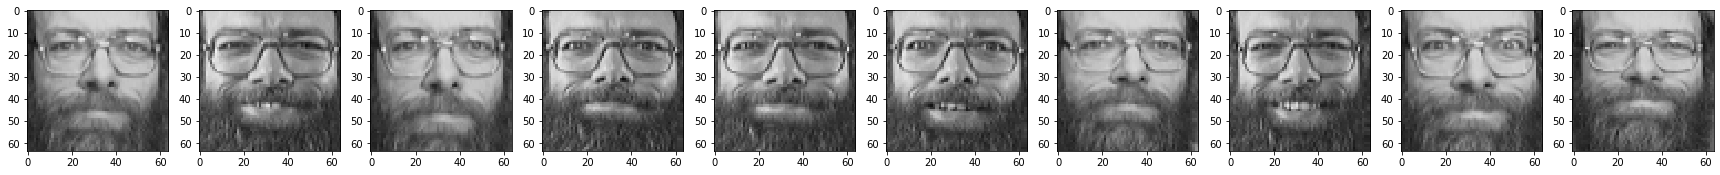

In [118]:
# Sample images of a subject
img_cnt = 10
plt.figure(figsize=(24,24))
for i in range(img_cnt):
    plt.subplot(1,10,i+1)
    x=pics[i+360] # 4th subject
    imshow(x)
plt.show()

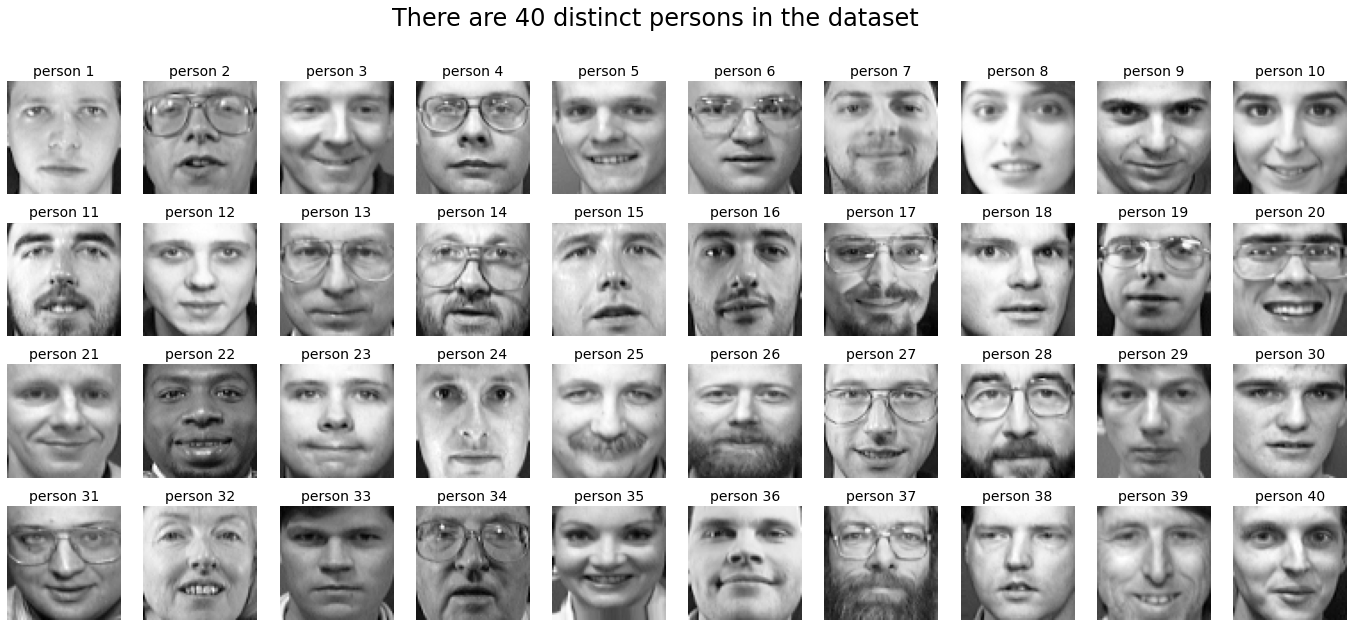

In [119]:
fig = plt.figure(figsize=(24, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = pics[10*(i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=14)
    plt.axis('off')
    
plt.suptitle("There are 40 distinct persons in the dataset", fontsize=24)
plt.show()

In [120]:
Y = labels
X=pics.reshape(pics.shape[0], pics.shape[1]*pics.shape[2]) # reshape and store images in X

print("X shape:",X.shape)
print("Y shape:",Y.shape)

X shape: (400, 4096)
Y shape: (400,)


In [121]:
#Split data for train and test purposes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.35, random_state=46)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (260, 4096)
x_test:  (140, 4096)
y_train:  (260,)
y_test:  (140,)


In [122]:
clf=svm.SVC()
grid={"C":[1e2, 1e3, 5e3, 1e4, 5e4, 1e5], "gamma": [1e-3, 5e-4, 1e-4, 5e-3]}

abc=GridSearchCV(clf,grid)
abc.fit(x_train, y_train)
pred=abc.predict(x_test)
abc.best_estimator_

/home/renato/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


SVC(C=100.0, gamma=0.005)

In [123]:
print(y_test)
print(pred)
class_name = ('0', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39')

[34 15  8 12 31 27 17 25 34 28 30 35 23 10 37 10 11  1 26 25  0 17 39 32
 33 15 17 26  8 34  0 14 18 19 28  5 29  7 37 14 29 13 11 24 29  4  4 11
 21 13 25 27 36 24 33 19  7  5 26 14 35 12 11 38  0 26 31 38  3 34 13 36
 18 20 10  1 32  3 23  3 22 10 28  5 27  1 39 14  4  3  7 39 10 30 35  1
 30 38  1 20  1 10  9 21 30 35 24 11 21 15 30  2 26 21 36  6 17 32 11  6
 20 18  7  2 33 28  6 13 15 16  5 25 38 37 22 37 21 16 39 14]
[20  6  8  3 31 27 17 25 34 28 30 35 23 10 37 10 11  1 26 22  0 17 39 32
 33 15 17 26  8 34  0 14 18 19 28  5 29  7 37 14 29 13 11 24 29  4  4 11
 21 13 25 27 36 24 33 19  7  5 26 14 35 12 11 38  0 26 31 38  3 34 13 36
 18 20 10  1 32  3 23 22 22 10 28  5 27  1  0 14  4  3  7 39 10 30 35  1
 30 38  1 20  1 10  9 21 30 35 24 11 21  6 30  2 26 21 36  6 17 32 11  6
 20 18  0  2 33 28  6 13  0 16  5 25 38 37 22 37 21 16 39 14]


In [124]:
print(x_train.shape)
print(x_test.shape)
xTrain = np.array(x_train.reshape(-1,64,64,1))
xTest = np.array(x_test.reshape(-1,64,64,1))
print(xTrain.shape)
print(xTest.shape)

lbTrain = LabelBinarizer()
lbTest = LabelBinarizer()
yTrain = lbTrain.fit_transform(y_train)
yTest = lbTest.fit_transform(y_test)

(260, 4096)
(140, 4096)
(260, 64, 64, 1)
(140, 64, 64, 1)


In [125]:
rounded_labels=np.argmax(yTest, axis=1)
cm = metrics.confusion_matrix(rounded_labels, pred, labels=range(40))

#print(rounded_labels)
#print(pred)
#print(cm)

In [126]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # matriz de confusao
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # visualizacao
    fig, ax = plt.subplots(figsize=(15, 15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=classes, yticklabels=classes, title=title, ylabel='True label', xlabel='Predicted label')

    # girar os rótulos e definir o alinhamento
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # loop sobre dimensoes de dados e criar anotacoes de texto
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization


<Figure size 1440x1440 with 0 Axes>

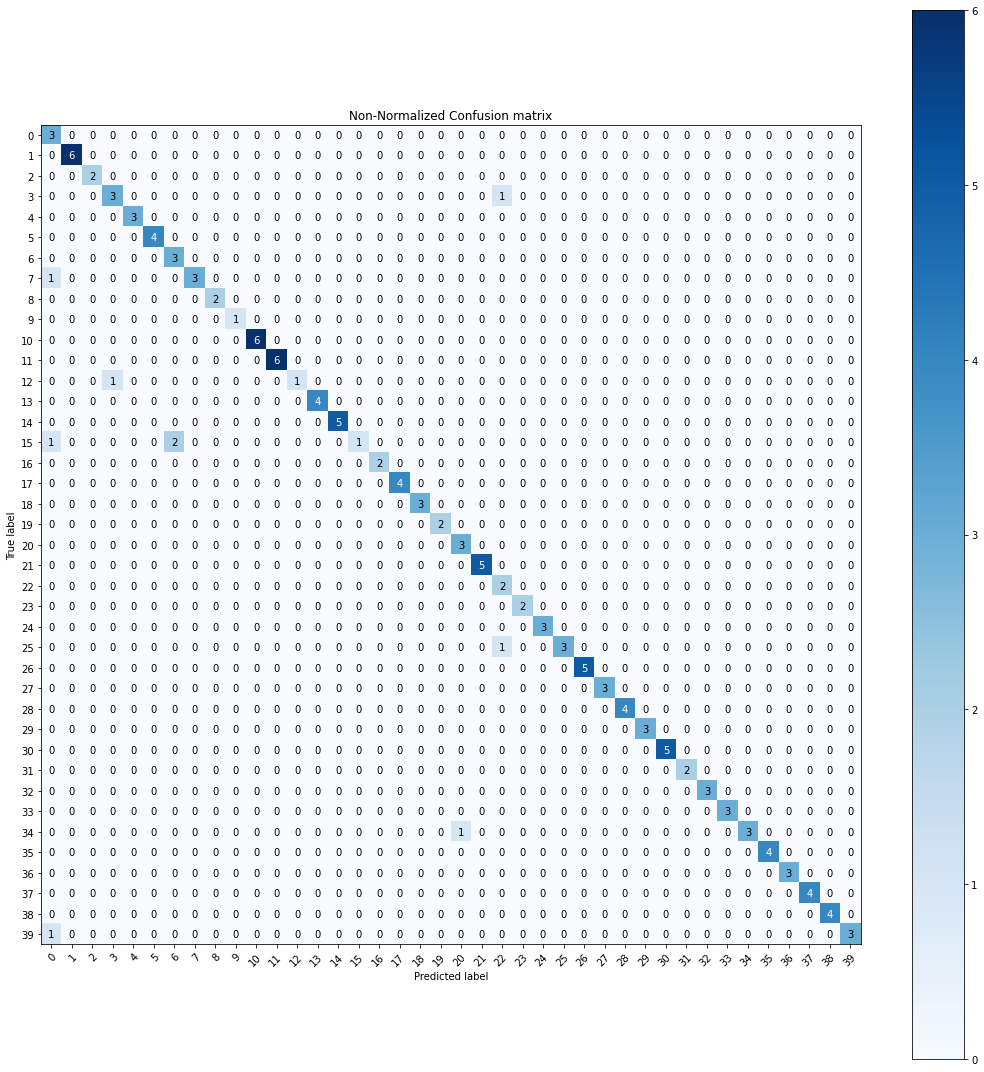

In [127]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(rounded_labels, pred, classes = class_name, title='Non-Normalized Confusion matrix')
plt.show()

Normalized confusion matrix


<Figure size 2520x2520 with 0 Axes>

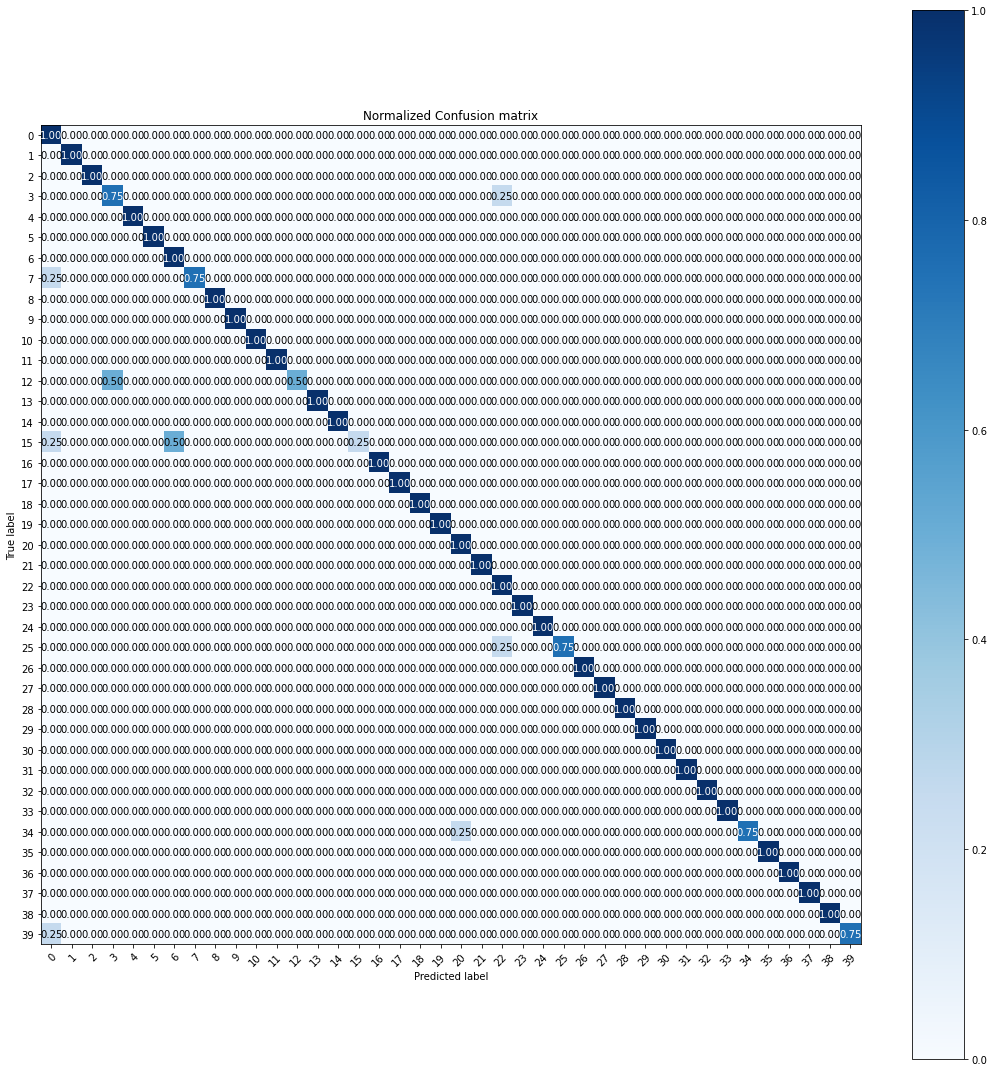

In [128]:
plt.figure(figsize=(35,35))
plot_confusion_matrix(rounded_labels, pred, classes = class_name, normalize=True, title='Normalized Confusion matrix')
plt.show()

In [129]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(rounded_labels, pred)
print('Accuracy Score = ',acc_score) 
#Accuracy Score =  0.4083  - 280 traino, 120 teste  (30% teste)   SVC(C=100.0, gamma=0.005)
#Accuracy Score =  0.9357  - 260 traino, 140 teste  (35% teste)   SVC(C=100.0, gamma=0.005)
#Accuracy Score =  0.925   - 240 traino, 160 teste  (40% teste)   SVC(C=100.0, gamma=0.005)

Accuracy Score =  0.9357142857142857


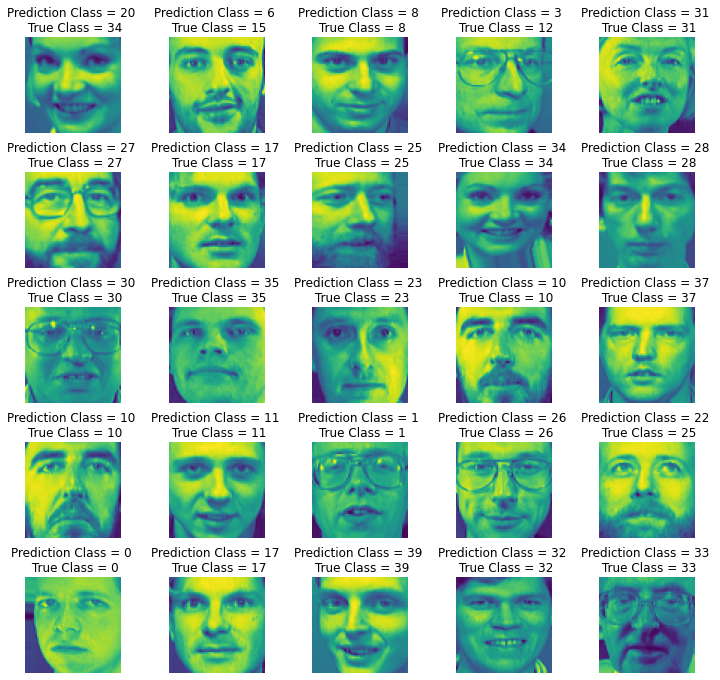

In [130]:
fig, axes = plt.subplots(5, 5, figsize = (12,12)) 
axes = axes.ravel() 
for i in np.arange (0, 5*5):
    if (pred[i] >= 9):
        axes[i].imshow(xTest[i].reshape(64,64)) 
        axes[i].set_title("Prediction Class = {0} \n True Class = {1}".format(pred[i], y_test[i])) 
        axes[i].axis('off') 
    else:
        axes[i].imshow(xTest[i].reshape(64,64)) 
        axes[i].set_title("Prediction Class = {0} \n True Class = {1}".format(pred[i], y_test[i])) 
        axes[i].axis('off') 
plt.subplots_adjust(wspace = 0.5)

In [136]:
# plotting the predicted values along with true values
def plot_gallery(images,titles,h,w,row=3,col=11):
    plt.figure(figsize=(1.4*col,2*row))
    plt.subplots_adjust(bottom=0,left=0.1,right=.99,top=0.80,hspace=.35)
    for i in range(33):
        plt.subplot(row,col,i+1)
        plt.imshow(images[i].reshape((64,64)),cmap=plt.cm.bone)
        plt.title(titles[i],size=12)
        plt.xticks([])
        plt.yticks([])
def title(y_pred,y_test,i):
    return 'predicted: %s\n true: %s'%(y_pred[i],y_test[i])

# funtion for plotting important elements
def plotting_fig(s):
    fig=plt.figure(figsize=(7,7))
    for i in range(49):
        ax=fig.add_subplot(7,7,i+1)
        ax.imshow(s[i], cmap=plt.cm.bone)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [137]:
#With pca

from sklearn.decomposition import PCA

# running principle component analysis for finding number of components
pca=PCA()
pca.fit(x_train)

# calculating number of features to be kept for 95% variance
k=0
total=sum(pca.explained_variance_)
print(total)
current_sum=0

while current_sum/total<0.95:
    current_sum+=pca.explained_variance_[k]
    k=k+1
print(k)

77.64567699453319
99


In [138]:
# running PCA provided with number of components to retain
pca=PCA(n_components=k,whiten= True)
x_transformed=pca.fit_transform(x_train)
x_train_pca=x_transformed
print(x_train.shape)
print(x_train_pca.shape)


x_test_pca= pca.transform(x_test)
print(x_test.shape)
print(x_test_pca.shape)

(260, 4096)
(260, 99)
(140, 4096)
(140, 99)


In [139]:
x_approx= pca.inverse_transform(x_transformed)
x_approx= x_approx.reshape((260,64,64))

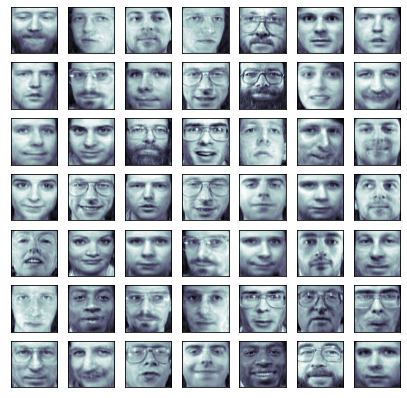

In [140]:
plotting_fig(x_approx)      # images after keeping only 95% of varience

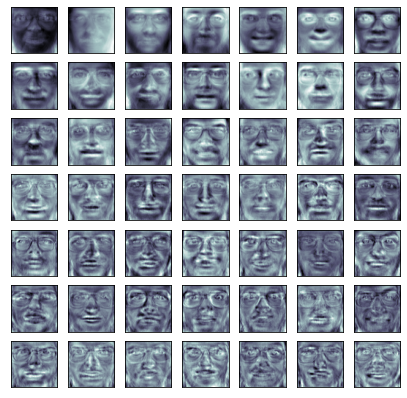

In [141]:
eig_v= pca.components_.reshape((k,64,64))   # regenerated images from principle components only
plotting_fig(eig_v)

In [142]:
clf=svm.SVC()
grid={"C":[1e2, 1e3, 5e3, 1e4, 5e4, 1e5], "gamma": [1e-3, 5e-4, 1e-4, 5e-3]}

abc2=GridSearchCV(clf,grid)
abc2.fit(x_train_pca, y_train)
pred2=abc2.predict(x_test_pca)
abc2.best_estimator_


/home/renato/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


SVC(C=100.0, gamma=0.005)

In [143]:
print('Accuracy score is ',abc2.score(x_test_pca,y_test)*100)

Accuracy score is  94.28571428571428


Confusion matrix, without normalization


<Figure size 1440x1440 with 0 Axes>

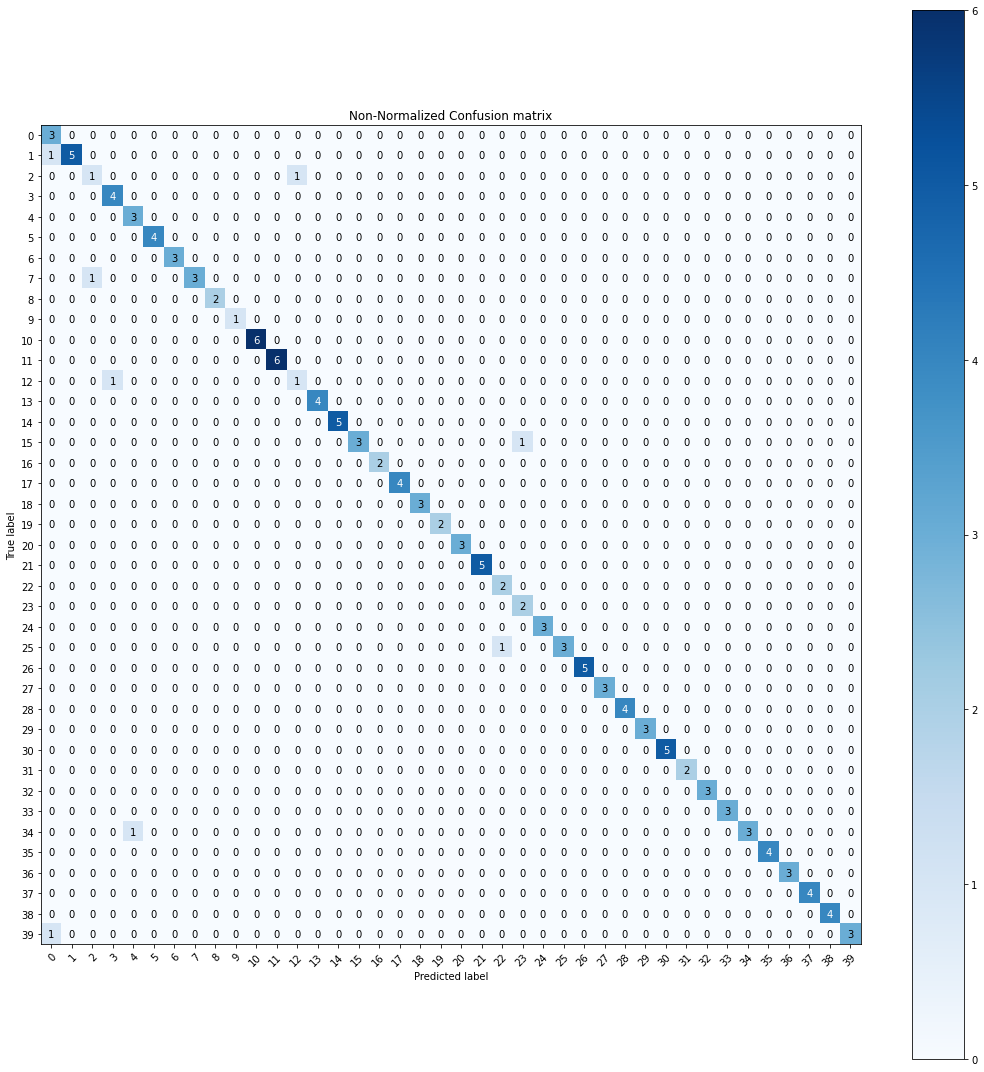

In [144]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(rounded_labels, pred2, classes = class_name, title='Non-Normalized Confusion matrix')
plt.show()

Normalized confusion matrix


<Figure size 2520x2520 with 0 Axes>

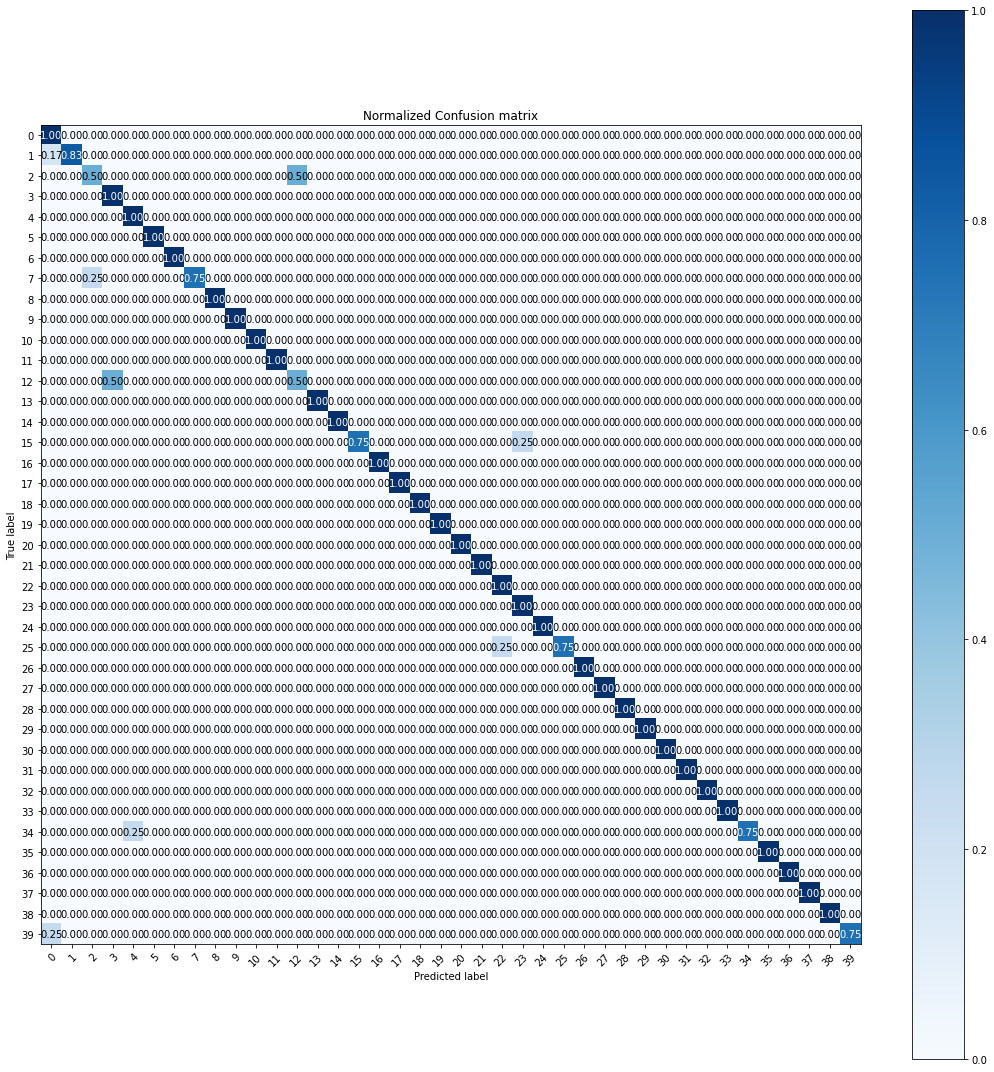

In [145]:
plt.figure(figsize=(35,35))
plot_confusion_matrix(rounded_labels, pred2, classes = class_name, normalize=True, title='Normalized Confusion matrix')
plt.show()

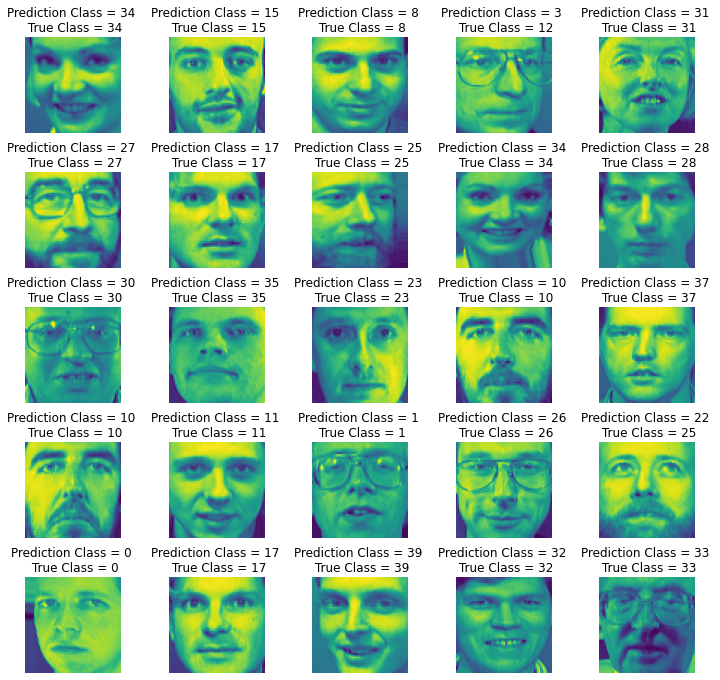

In [146]:
fig, axes = plt.subplots(5, 5, figsize = (12,12)) 
axes = axes.ravel() 
for i in np.arange (0, 5*5):
    if (pred[i] >= 9):
        axes[i].imshow(xTest[i].reshape(64,64)) 
        axes[i].set_title("Prediction Class = {0} \n True Class = {1}".format(pred2[i], y_test[i])) 
        axes[i].axis('off') 
    else:
        axes[i].imshow(xTest[i].reshape(64,64)) 
        axes[i].set_title("Prediction Class = {0} \n True Class = {1}".format(pred2[i], y_test[i])) 
        axes[i].axis('off') 
plt.subplots_adjust(wspace = 0.5)